In [1]:
import urllib2
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from math import sqrt
import matplotlib.pyplot as plt
import random

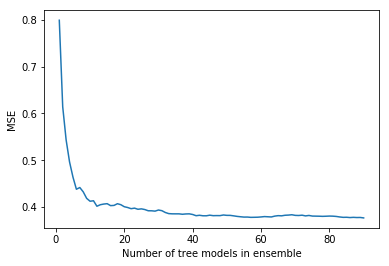

('Minimum MSE = ', 0.37669566130127335)


In [2]:
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib2.urlopen(target_url)

xList = []
labels = []
names = []
firstline = True
for line in data:
    if firstline:
        names = line.strip().split(";")
        firstline = False
    else:
        row = line.strip().split(";")
        labels.append(float(row[-1]))
        row.pop()
        floatRow = [float(num) for num in row]
        xList.append(floatRow)
        
# Normalize columns in x and labels

nrows = len(xList)
ncols = len(xList[0])

# Take fixed test set 30% of sample

random.seed(1)
nSample = int(nrows * 0.30)
idxTest = random.sample(range(nrows), nSample)
idxTest.sort()


idxTrain = [i for i in range(nrows) if not(i in idxTest)]

# Define test and training sets

xTrain = [xList[r] for r in idxTrain]
yTrain = [labels[r] for r in idxTrain]
xTest = [xList[r] for r in idxTest]
yTest = [labels[r] for r in idxTest]


# Train a series of models on random subsets of the training data
# Collect the models in a list and check error of composite as list grows

# Maximum of models to generate 40
maxTree = 90

# Tree Depth
treeDepth = 12

# Pick how many attributes will be used in each model
# author recommend 1/3 for regression problem
nAttr = 4

# Initialize a list to hold models
modelList = []
indexList = []
predList = []
nTrainRows = len(yTrain)

for j in range(maxTree):
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    
    # Take random sample of attributes
    idxAttr = random.sample(range(ncols), nAttr)
    idxAttr.sort()
    indexList.append(idxAttr)
    
    # Take random sample of training rows
    idxRows = []
    for i in range(int(0.5 * nTrainRows)):
        idxRows.append(random.choice(range(len(xTrain))))
        
    idxRows.sort()
    
    # Build training set
    xRfTrain = []
    yRfTrain = []
    
    for i in range(len(idxRows)):
        temp = [xTrain[idxRows[i]][k] for k in idxAttr]
        xRfTrain.append(temp)
        yRfTrain.append(yTrain[idxRows[i]])
        
    modelList[-1].fit(xRfTrain,yRfTrain)
    
    # Restrict xtest to attributes selected for training
    xRfTest = []
    for xx in xTest:
        temp = [xx[i] for i in idxAttr]
        xRfTest.append(temp)
        
    latestOutSamplePred = modelList[-1].predict(xRfTest)
    predList.append(list(latestOutSamplePred))
    
# Build cumulative prediction from first 'n' models
mse = []
allPred = []
for i in range(len(modelList)):
    prediction = []
    for j in range(len(xTest)):
        prediction.append(sum([predList[k][j] for k in range(i +1)])/(i +1))
        
    allPred.append(prediction)
    errors = [(yTest[k] - prediction[k]) for k in range(len(yTest))]
    mse.append(sum([e * e for e in errors])/len(yTest))
    
nModels = [i +1 for i in range(len(modelList))]

plt.plot(nModels,mse)
plt.axis('tight')
plt.xlabel('Number of tree models in ensemble')
plt.ylabel("MSE")
#plt.ylim((0.0, max(mse)))
plt.show()

print ("Minimum MSE = ", min(mse))


        
        
        
        
        
        
        
        